# Project Milestone P2
## Testing Propositions Derived from Twitter Studies

---
This milestone aims to replicate the figure 1A from the paper "Testing Propositions Derived from Twitter Studies". My approach to replicating the figure comes in 4 main steps:
1. Load the data.
2. Check against the supplementary information.
3. Calculate CCDF and remove irrelevant data.
4. Visualise the data.

## Step 1: Load the data
1. The data is extracted and converted into 5 txt files and placed in the same folder as this notebook.
2. Since each file is in the same format, we can use the pandas **read_csv** function to read the data and set the seperator as '\t'. For EgoTimelines, we need the encoding = 'ISO-8859-1' to convert a bytes object to a string object using a particular character set encoding.


In [1]:
import pandas as pd

#Read EgoAlterProfiles.txt
EgoAlterProfiles = pd.read_csv("EgoAlterProfiles.txt",sep="\t")

#Read EgoNetworks.txt
EgoNetworks = pd.read_csv("EgoNetworks.txt",sep="\t")

#Read EgoTimelines.txt
EgoTimelines = pd.read_csv("EgoTimelines.txt", encoding = 'ISO-8859-1', sep="\t") 

#Read Exposure.txt
Exposure = pd.read_csv("Exposure.txt",sep="\t")

#Read MANIFEST.txt
Manifest = pd.read_csv("MANIFEST.txt",sep="\t")

Let's get a glimpse of the data.

In [2]:
EgoAlterProfiles.head()

,ID,IsEgo,followers_count,friends_count,statuses_count,utc_offset,lang,created_at,protected
0,1,True,30.0,28,9.0,NaN,en,Wed Oct 26 03:30:32 +0000 2011,False
1,2,True,2.0,8,7.0,-14400.0,en,Mon Jul 27 20:46:32 +0000 2009,False
2,3,True,1.0,0,0.0,NaN,fr,Mon Apr 23 20:57:26 +0000 2012,False
3,4,True,3.0,3,68.0,NaN,en,Sun Feb 14 07:50:39 +0000 2010,False
4,5,True,65.0,118,748.0,NaN,fr,Mon Jun 11 14:17:06 +0000 2012,False


In [3]:
EgoNetworks.head()

,egoID,followerID,followeeID
0,1,1,1573741
1,1,1,1662720
2,1,1,1968904
3,1,1,1970142
4,1,1,1970507


In [4]:
EgoTimelines.head()

,replyto_userid,retweeted_userid,id,tweetid,created_at,hashtags,urls,mentions_ids,retweet_count,egoID,retweetedUserID,replytoUserID,metionID
0,NaN,NaN,398477318,249552537051598848,Sat Sep 22 16:55:35 +0000 2012,NaN,NaN,2810549959,0,1,NaN,NaN,NaN
1,NaN,NaN,398477318,249537963145433088,Sat Sep 22 15:57:41 +0000 2012,NaN,NaN,2810549959,0,1,NaN,NaN,NaN
2,NaN,NaN,398477318,129377372209299456,Thu Oct 27 02:02:23 +0000 2011,NaN,NaN,NaN,0,1,NaN,NaN,NaN
3,NaN,NaN,398477318,302401054690140160,Fri Feb 15 12:56:44 +0000 2013,NaN,NaN,797583722,0,1,NaN,NaN,1970142
4,NaN,NaN,398477318,249538739611787264,Sat Sep 22 16:00:46 +0000 2012,NaN,NaN,2810549959,0,1,NaN,NaN,NaN


In [5]:
Exposure.head()

,egoID,exposeTimes,NotRT,RT,ProbRT
0,25282,1,297,0,0.00000
1,25282,2,9,0,0.00000
2,25282,3,1,0,0.00000
3,25282,4,1,0,0.00000
4,15072,1,406,293,0.41917


In [6]:
Manifest.head()

,EgoAlterProfiles.rar (application/rar) 44916646 bytes.
0,EgoNetworks.rar (application/rar) 11231910 bytes.
1,EgoTimelines.rar (application/rar) 106172616 b...
2,Exposure.txt (text/plain) 747518 bytes.


## Step 2: Check against supplementary information

The supplementary information document gives us an idea of how the figure was created. It mentioned that it used the number of statuses in ego profiles. This indicates that we only need to use the column "statuses_count" in the file "EgoAlterProfiles".

Looking at the file "EgoAlterProfiles", there is another column called "IsEgo". As the figure only looks at ego profiles, we first need to remove non-egos in the data.


In [7]:
#Retain only egos
egos = EgoAlterProfiles.loc[EgoAlterProfiles['IsEgo'] == True]

In [8]:
#As the figure focuses on tweets, rename statuses as tweets.
tweets = egos['statuses_count']
tweets

0          9.0
1          7.0
2          0.0
3         68.0
4        748.0
         ...  
34001      0.0
34002    370.0
34003      0.0
34004      0.0
34005      0.0
Name: statuses_count, Length: 34006, dtype: float64

The supplementary information document also gave us the number of users for each selection of N (number of tweets). Before visualising our data, let's confirm that our data aligns with the supplementary information:

- N ≥ 0: 34,006.
- N ≥ 1: 18,830.
- N ≥ 2: 14,943.
- N ≥ 3: 13,079.
- N ≥ 4: 11,916.
- N ≥ 5: 11,111.

In [11]:
import numpy as np

#As the tweets are not sorted, we need to first sort them.
tweets_sorted = np.sort(tweets)

#Print the number of users for each selection of N
TWEETS = []
N = 6
for i in range(N):
    tweets_sorted_i = tweets_sorted[tweets_sorted>=i]
    TWEETS.append(tweets_sorted_i)
    print("Number of users (N ≥ %d): {}".format(len(TWEETS[i])) %i)

Number of users (N ≥ 0): 34006
Number of users (N ≥ 1): 18830
Number of users (N ≥ 2): 14943
Number of users (N ≥ 3): 13079
Number of users (N ≥ 4): 11916
Number of users (N ≥ 5): 11111


## Step 3: Calculate CCDF and remove irrelevant data
Now that the data aligns with that of the supplementary information, we can calculate complementary cumulative distribution function (CCDF) and remove irrelevant data.

Figure 1A in the paper plots CCDF against the number of tweets. As we already have the number of tweets sorted into each selection of N, we need to do the following:
1. Calculate CCDFs
2. Drop duplicate CCDFs for each tweet

In [12]:
#Calculate CCDFs
CCDF = []
for i in range(N):
    cdf_i = np.array(range(len(TWEETS[i])))/float(len(TWEETS[i])) #calculate CDF
    ccdf_i = 1-cdf_i #calculate CCDF
    CCDF.append(ccdf_i[:len(TWEETS[i])])

In [13]:
#To check the data, use pandas DataFrame
for i in range(N):    
    d_i = {'Tweets':TWEETS[i],'CCDF':CCDF[i]}
    df_i = pd.DataFrame(d_i, columns = ['Tweets','CCDF'])
    print(df_i)

          Tweets      CCDF
0            0.0  1.000000
1            0.0  0.999971
2            0.0  0.999941
3            0.0  0.999912
4            0.0  0.999882
...          ...       ...
34001   117375.0  0.000147
34002   143685.0  0.000118
34003   147067.0  0.000088
34004   183715.0  0.000059
34005  1082327.0  0.000029

[34006 rows x 2 columns]
          Tweets      CCDF
0            1.0  1.000000
1            1.0  0.999947
2            1.0  0.999894
3            1.0  0.999841
4            1.0  0.999788
...          ...       ...
18825   117375.0  0.000266
18826   143685.0  0.000212
18827   147067.0  0.000159
18828   183715.0  0.000106
18829  1082327.0  0.000053

[18830 rows x 2 columns]
          Tweets      CCDF
0            2.0  1.000000
1            2.0  0.999933
2            2.0  0.999866
3            2.0  0.999799
4            2.0  0.999732
...          ...       ...
14938   117375.0  0.000335
14939   143685.0  0.000268
14940   147067.0  0.000201
14941   183715.0  0.000134
149

In [14]:
#As there are duplicate CCDFs for the same number of tweets, we need to drop them
for i in range(N):    
    d_i = {'Tweets':TWEETS[i],'CCDF':CCDF[i]}
    df_i = pd.DataFrame(d_i, columns = ['Tweets','CCDF'])
    df_unique_i = df_i.drop_duplicates(subset=['Tweets'])
    print(df_unique_i)

          Tweets      CCDF
0            0.0  1.000000
15176        1.0  0.553726
19063        2.0  0.439422
20927        3.0  0.384609
22090        4.0  0.350409
...          ...       ...
34001   117375.0  0.000147
34002   143685.0  0.000118
34003   147067.0  0.000088
34004   183715.0  0.000059
34005  1082327.0  0.000029

[2414 rows x 2 columns]
          Tweets      CCDF
0            1.0  1.000000
3887         2.0  0.793574
5751         3.0  0.694583
6914         4.0  0.632820
7719         5.0  0.590069
...          ...       ...
18825   117375.0  0.000266
18826   143685.0  0.000212
18827   147067.0  0.000159
18828   183715.0  0.000106
18829  1082327.0  0.000053

[2413 rows x 2 columns]
          Tweets      CCDF
0            2.0  1.000000
1864         3.0  0.875259
3027         4.0  0.797430
3832         5.0  0.743559
4460         6.0  0.701532
...          ...       ...
14938   117375.0  0.000335
14939   143685.0  0.000268
14940   147067.0  0.000201
14941   183715.0  0.000134
14942

## Step 4: Visualise the data
To replicate Figure 1A, we need to plot CCDF against number of tweets, with both axes on logarithmic scales.

It is important to note that in Figure 1A in the paper, the first plotted data point for N ≥ 0, its CCDF is 1 and for N ≥ 1, its CCDF is 2. Therefore, in order to replicate the figure exactly, we need to shift the tweets by an increment of 1 for each selection of N.

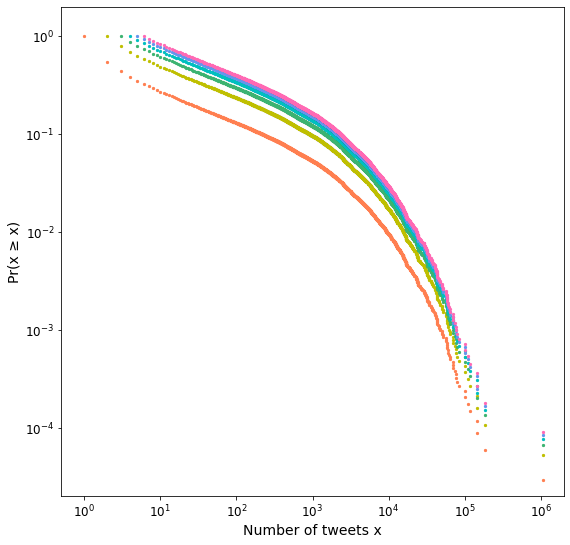

In [15]:
import matplotlib.pyplot as plt

#Plot CCDF against Number of tweets
fig = plt.figure(figsize=(9,9))
plt.xlim(0.5, 2e6)
plt.ylim(2e-5, 2e0)
plt.xscale('log') #set x-axis on log scale
plt.yscale('log') #set y-axis on log scale 
plt.xlabel('Number of tweets x', fontsize=14)
plt.ylabel('Pr(x ≥ x)', fontsize=14)
plt.minorticks_off()
plt.tick_params(axis='both', labelsize=12)

colors = ['coral', 'y', 'mediumseagreen', 'c', 'cornflowerblue', 'hotpink'] #set range of colours

for i in range(N):
    d_i = {'Tweets':TWEETS[i],'CCDF':CCDF[i]}
    df_i = pd.DataFrame(d_i, columns = ['Tweets','CCDF'])
    df_unique_i = df_i.drop_duplicates(subset=['Tweets'])
    
    plt.scatter(df_unique_i.Tweets+1, df_unique_i.CCDF, color=colors[i], s=5, marker='o') #shift tweets by increment of 1
